In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
base2 = pd.read_csv('Advertising.csv')
base2.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# removendo coluna de índice, se existir
if "Unnamed: 0" in base2.columns:
    base2 = base2.drop(columns=["Unnamed: 0"])

In [12]:
# variáveis independentes e dependente
X = base2.drop(columns=["Sales"])
y = base2["Sales"]


In [13]:
# split treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# previsões
y_pred = model.predict(X_test)

In [17]:
# métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.8994
MSE: 3.1741


In [18]:
# coeficientes
coeficientes = pd.DataFrame({
    "Feature": X.columns,
    "Coeficiente": model.coef_
})

print("\nCoeficientes do modelo:")
print(coeficientes)


Coeficientes do modelo:
     Feature  Coeficiente
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


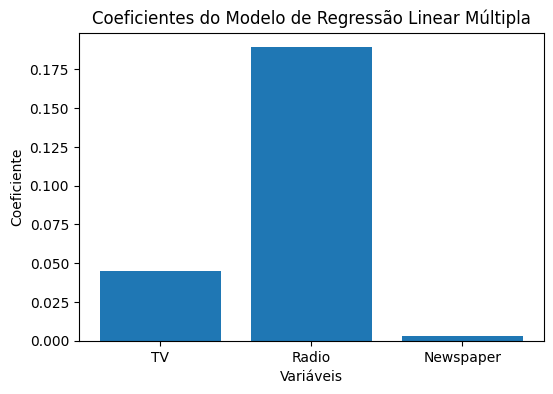

In [20]:
# mostrando graficamente os coeficientes
plt.figure(figsize=(6,4))
plt.bar(coeficientes["Feature"], coeficientes["Coeficiente"])
plt.title("Coeficientes do Modelo de Regressão Linear Múltipla")
plt.xlabel("Variáveis")
plt.ylabel("Coeficiente")
plt.show()

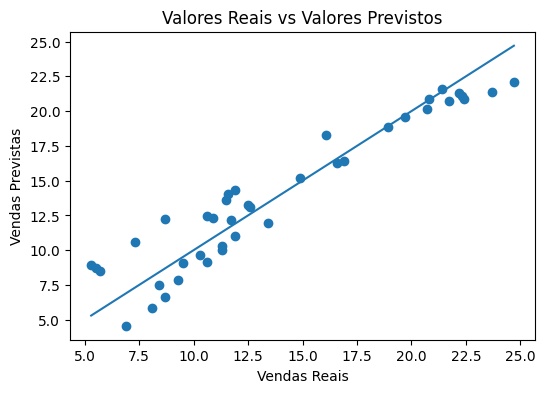

In [23]:
# mostrando graficamente os resultados

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Previstas")
plt.title("Valores Reais vs Valores Previstos")
plt.show()
